In [1]:
# Standard libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
# Train-test and preprocessing functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Classifiers
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
# Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [2]:
# Download the data from
# https://www.kaggle.com/uciml/pima-indians-diabetes-database
#filename = 'C:\Users\angus\OneDrive\Desktop\ML\practicals\archive\diabetes.csv'
diabetes = pd.read_csv(r'C:\Users\angus\OneDrive\Desktop\ML\practicals\archive\diabetes.csv')
# Missing values indicated by 0 - replace by nan
for name in diabetes.keys()[1:-1]:
    # for features other than pregnancies, 0 indicate a missing value, so replace by nan
    diabetes[name] = diabetes[name].replace({0: np.nan})
    diabetes.isna().sum()
    # remove the dimensions with large number of missing data
    df = diabetes.drop(columns=['SkinThickness', 'Insulin'])
    df = df.dropna() # remove examples with missing data
    # X and y data
    X = df[df.keys()[0:-1]]
    y = df[df.keys()[-1]]


In [3]:
X


,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,33.6,0.627,50
1,1,85.0,66.0,26.6,0.351,31
2,8,183.0,64.0,23.3,0.672,32
3,1,89.0,66.0,28.1,0.167,21
4,0,137.0,40.0,43.1,2.288,33
...,...,...,...,...,...,...
763,10,101.0,76.0,32.9,0.171,63
764,2,122.0,70.0,36.8,0.340,27
765,5,121.0,72.0,26.2,0.245,30
766,1,126.0,60.0,30.1,0.349,47


In [4]:
type(y)

pandas.core.series.Series

In [5]:
temp = pd.concat([X, y], axis = 1)
list(temp.columns)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

<Figure size 432x288 with 0 Axes>

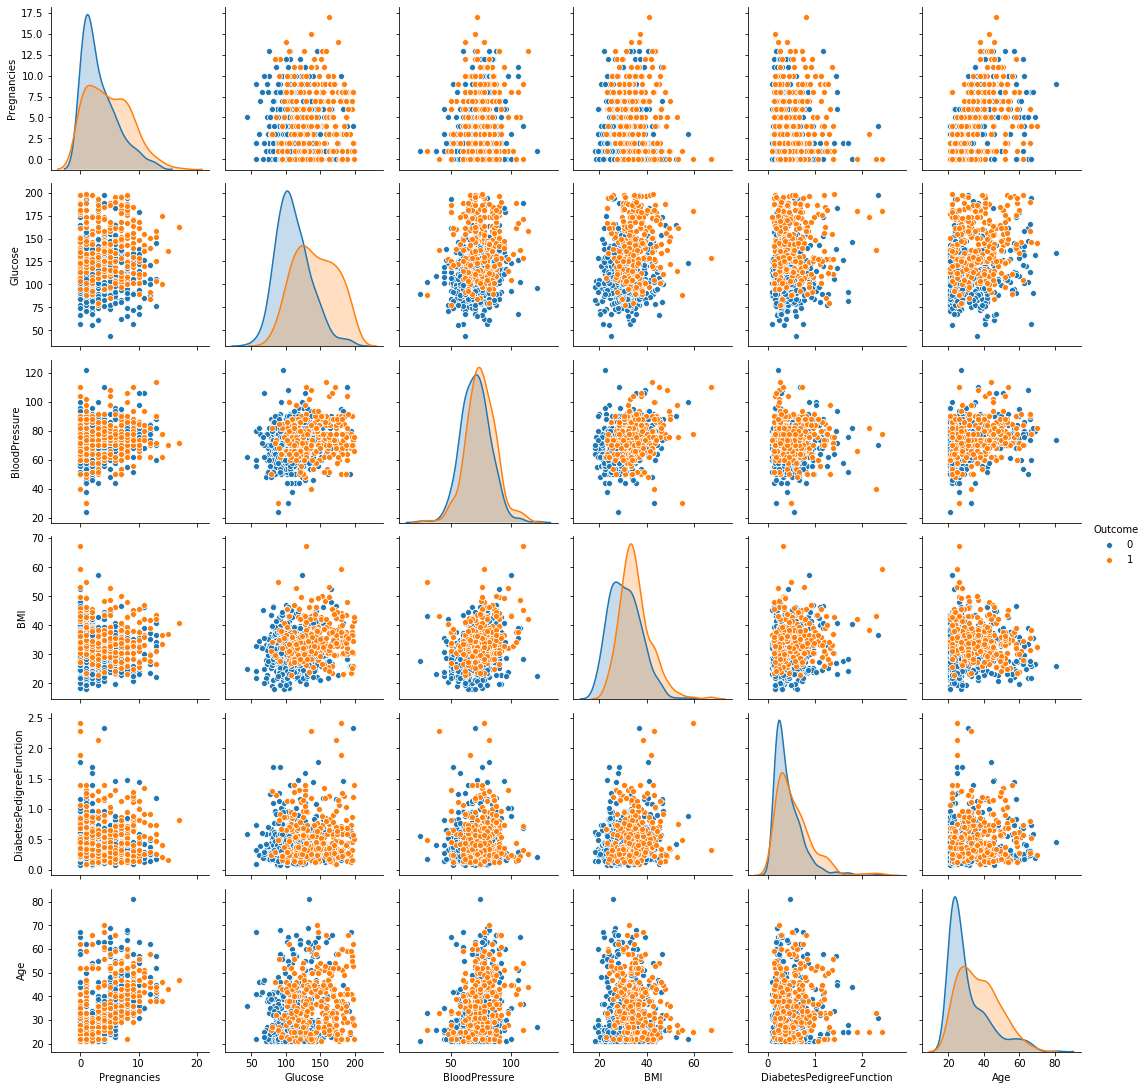

In [6]:
plt.figure()
sns.pairplot(data = temp, hue = 'Outcome')


In [7]:
# Split training/test set
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.25, random_state=12)


In [8]:
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train)
X_test2 = scaler.transform(X_test)
#y_train2 = scaler.fit_transform(y_train)
#y_test2 = scaler.fit_transform(y_test)

In [9]:
X_train2 = pd.DataFrame(X_train2)

In [10]:
X_train2.cov()

,0,1,2,3,4,5
0,1.001845,0.101513,0.239621,0.006891,-0.021543,0.550891
1,0.101513,1.001845,0.232703,0.226112,0.154497,0.286983
2,0.239621,0.232703,1.001845,0.315786,0.013333,0.342662
3,0.006891,0.226112,0.315786,1.001845,0.177930,0.023759
4,-0.021543,0.154497,0.013333,0.177930,1.001845,0.028395
5,0.550891,0.286983,0.342662,0.023759,0.028395,1.001845


### LDA

In [11]:
LDA_classifier = LinearDiscriminantAnalysis(store_covariance = True)

In [12]:
LDA_classifier.fit(X_train2, y_train)

print("class means:")
print(LDA_classifier.means_)




class means:
[[-0.14902521 -0.35653314 -0.12723418 -0.21417667 -0.15338335 -0.18494109]
 [ 0.29076114  0.69562716  0.24824495  0.41787731  0.29926426  0.36083614]]


Train dataset performance

In [13]:
y_pred_train = LDA_classifier.predict(X_train2)

print(LDA_classifier.score(X_train2, y_train))

confusion_matrix(y_train, y_pred_train)

0.7771639042357275


array([[320,  39],
       [ 82, 102]], dtype=int64)

Test dataset performance

In [14]:
y_pred_test = LDA_classifier.predict(X_test2)

print(LDA_classifier.score(X_test2, y_test))

confusion_matrix(y_test, y_pred_test)

0.7679558011049724


array([[105,  11],
       [ 31,  34]], dtype=int64)

### QDA

In [15]:
QDA_classifier = QuadraticDiscriminantAnalysis(store_covariance = True)

In [16]:
QDA_classifier.fit(X_train2, y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0, store_covariance=True,
                              tol=0.0001)

In [17]:
print("class means:")
print(QDA_classifier.means_)


class means:
[[-0.14902521 -0.35653314 -0.12723418 -0.21417667 -0.15338335 -0.18494109]
 [ 0.29076114  0.69562716  0.24824495  0.41787731  0.29926426  0.36083614]]


Covariance matrix for class 0

In [18]:
pd.DataFrame(QDA_classifier.covariance_[0])

,0,1,2,3,4,5
0,0.805798,0.046573,0.222780,0.015842,-0.066007,0.509593
1,0.046573,0.655384,0.166337,0.059782,0.084205,0.206404
2,0.222780,0.166337,0.984635,0.264887,0.009153,0.312525
3,0.015842,0.059782,0.264887,0.893387,0.119390,0.053400
4,-0.066007,0.084205,0.009153,0.119390,0.771766,0.006382
5,0.509593,0.206404,0.312525,0.053400,0.006382,0.920555


Covariance matrix for class 1

In [19]:
pd.DataFrame(QDA_classifier.covariance_[1])

,0,1,2,3,4,5
0,1.262273,-0.098052,0.164106,-0.195362,-0.067009,0.475135
1,-0.098052,0.949186,0.101185,0.110659,-0.023742,0.064454
2,0.164106,0.101185,0.947267,0.259323,-0.091400,0.267263
3,-0.195362,0.110659,0.259323,0.953929,0.103238,-0.263411
4,-0.067009,-0.023742,-0.091400,0.103238,1.321219,-0.092609
5,0.475135,0.064454,0.267263,-0.263411,-0.092609,0.968333


Train dataset performance

In [20]:
y_pred_train = QDA_classifier.predict(X_train2)

print(QDA_classifier.score(X_train2, y_train))

confusion_matrix(y_train, y_pred_train)

0.7845303867403315


array([[309,  50],
       [ 67, 117]], dtype=int64)

Test dataset performance

In [21]:
y_pred_test = QDA_classifier.predict(X_test2)

print(QDA_classifier.score(X_test2, y_test))

confusion_matrix(y_test, y_pred_test)

0.7016574585635359


array([[93, 23],
       [31, 34]], dtype=int64)

### Naive Bayes

In [22]:
NBClassifier = GaussianNB()

In [23]:
NBClassifier.fit(X_train, y_train)
print("means for each class:")
pd.DataFrame(NBClassifier.theta_)

means for each class:


,0,1,2,3,4,5
0,3.389972,111.105850,70.732591,30.778273,0.427618,31.222841
1,4.858696,144.271739,75.440217,35.188043,0.582761,37.538043


In [24]:
print("variance for classes 0 and 1:")
pd.DataFrame(NBClassifier.sigma_)

variance for classes 0 and 1:


,0,1,2,3,4,5
0,8.962129,649.387126,154.346320,43.366270,0.090411,122.908560
1,14.001773,938.002246,148.094253,46.182032,0.154366,128.944206


Train set performance

In [25]:
print(NBClassifier.score(X_train, y_train))
y_predict_train = NBClassifier.predict(X_train)
confusion_matrix(y_train, y_predict_train)

0.7697974217311234


array([[304,  55],
       [ 70, 114]], dtype=int64)

Test set performance

In [26]:
print(NBClassifier.score(X_test, y_test))
y_predict_test = NBClassifier.predict(X_test)
confusion_matrix(y_test, y_predict_test)

0.7292817679558011


array([[94, 22],
       [27, 38]], dtype=int64)

### Logistic Regression

In [27]:
LogisticClassifier = LogisticRegression()

In [28]:
LogisticClassifier.fit(X_train2, y_train)
LogisticClassifier.score(X_train2, y_train)

0.7808471454880295

In [29]:
LogisticClassifier.score(X_test2, y_test)

0.7624309392265194

### ROC and AUC

In [30]:
classifiers = [LogisticClassifier, NBClassifier, QDA_classifier, LDA_classifier]

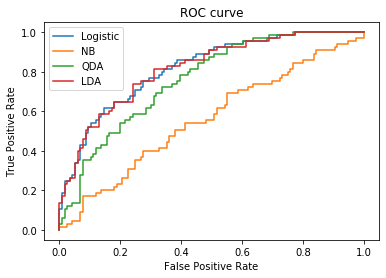

In [35]:
plt.figure()
for classifier in classifiers:
    predicted_proba = classifier.predict_proba(X_test2)[:, 1]
    fpr, tpr, threshold = roc_curve(y_test, predicted_proba)
    plt.plot(fpr, tpr)
    
plt.legend(['Logistic', 'NB', 'QDA', 'LDA'])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve');